# HW 2: Supervised Learning Models
### Will Dowling

In answering each of the following questions please include a) the question as a markdown header in your Jupyter notebook, b)  the raw code that you used to generate any results, tables, or figures along with the results themselves, and c) the top ten or fewer rows of the dataframe wherever relevant (do not include more than ten rows for any table in your report).


## Part 1: Regression on California Test Scores
Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

#### 1-1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
cts_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/HW/HW 2 Data/Caschool.csv')
print(cts_df.shape)
cts_df.head()

(420, 18)


,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [3]:
# Delete extra variables that are not continuous or related to testscr
cts_df = cts_df.drop(['readscr', 'mathscr', 'distcod', 'county', 'district', 'grspan', 'Unnamed: 0'], axis=1)
cts_df = cts_df.reset_index(drop=True)
cts_df.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


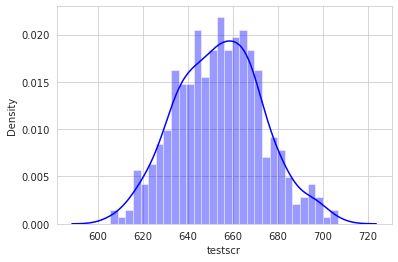

In [ ]:
# Visualizing distribution of test scores (dependent variable)
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(cts_df['testscr'], kde = True, color ='blue', bins = 30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


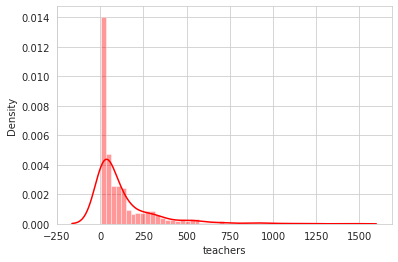

In [ ]:
# Visualizing Distribution of teachers (independent variable)
sns.set_style('whitegrid')
sns.distplot(cts_df['teachers'], kde = True, color ='red', bins = 50)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


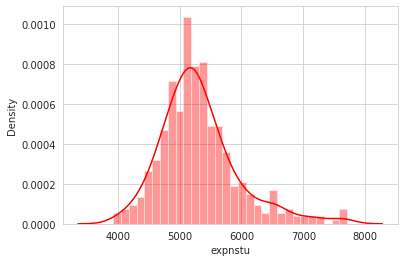

In [ ]:
# Visualizing Distribution of expenditure per student (independent variable)
sns.set_style('whitegrid')
sns.distplot(cts_df['expnstu'], kde = True, color ='red', bins = 30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


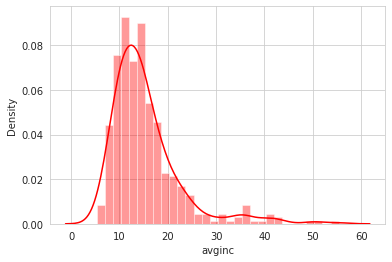

In [ ]:
# Visualizing Distribution of average income (independent variable)
sns.set_style('whitegrid')
sns.distplot(cts_df['avginc'], kde = True, color ='red', bins = 30)

#### 1.2 Visualize the dependency of the target on each feature from 1.1.

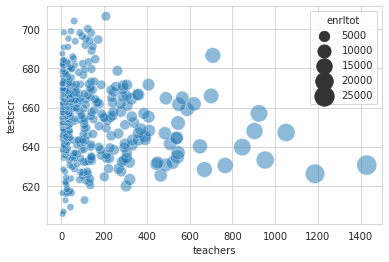

In [ ]:
# Visualizing dependency of test scores on teachers, expenditure, and income
sns.set_style('whitegrid')
plt1 = sns.scatterplot(data=cts_df, x='teachers', y='testscr', size="enrltot",
            sizes=(40, 400), alpha=.5, palette="muted")

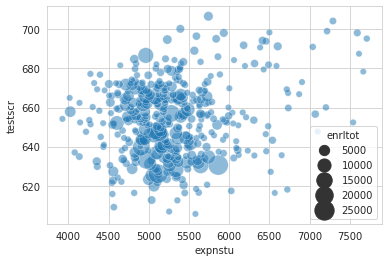

In [ ]:
plt2 = sns.scatterplot(data=cts_df, x='expnstu', y='testscr', size="enrltot",
            sizes=(40, 400), alpha=.5, palette="muted")

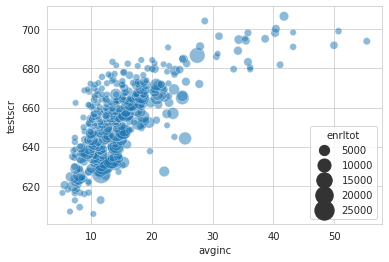

In [ ]:
plt3 = sns.scatterplot(data=cts_df, x='avginc', y='testscr', size="enrltot",
            sizes=(40, 400), alpha=.5, palette="muted")

#### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [4]:
# Creating X and Y dataframes
y = cts_df['testscr']
X = cts_df.loc[:, cts_df.columns != 'testscr']
display(X.head())
print(y[0:5])

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split

# train_test_split(X,y) to create four new data sets to .75/.25 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

print(X.shape)
X_train.shape

(420, 10)


(315, 10)

In [6]:
## Creating ML models: KNN, Linear, Ridge, and Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from statistics import mean 

import warnings
warnings.filterwarnings('ignore')

## Creating Model Architecture
#Knn
kfold = KFold(n_splits=5)
knn = KNeighborsRegressor(n_neighbors=5)
knn_m = knn.fit(X_train, y_train)

#Linear Model
lr = LinearRegression()
ln = lr.fit(X_train, y_train)

#Ridge Model
ridge = Ridge().fit(X_train, y_train)

#Lasso Model
lasso = Lasso().fit(X_train, y_train)

## Evaluating ecah model using cross-validation with standard parameters
print("KNN Training set score:\n{}".format(
mean(cross_val_score(knn, X_train, y_train, cv=kfold)))) #KNN
print("KNN Test set score: {:.3f}".format(knn_m.score(X_test, y_test)))

print("Linear Training set score:\n{}".format(
mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="r2")))) #Linear
print("Linear Test set score: {:.3f}".format(ln.score(X_test, y_test)))

print("Ridge Training set score:\n{}".format(
mean(cross_val_score(Ridge(), X_train, y_train, cv=kfold)))) #Ridge
print("Ridge Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

print("Lasso Training set score:\n{}".format(
mean(cross_val_score(Lasso(), X_train, y_train, cv=kfold)))) #Lasso
print("Lasso Test set score: {:.3f}".format(lasso.score(X_test, y_test)))
print("Lasso Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

KNN Training set score:
-0.02494386044909127
KNN Test set score: 0.077
Linear Training set score:
0.8067280808890968
Linear Test set score: 0.746
Ridge Training set score:
0.8187049408554575
Ridge Test set score: 0.745
Lasso Training set score:
0.8224952546259984
Lasso Test set score: 0.744
Lasso Number of features used: 8


The KNN model appears to perform quite badly on unscaled data. The other model methods appear to be relatively accurate.

In [13]:
#Running same models, but re-scaling the data using standard scaler
from sklearn import preprocessing

#Setting up the the standard scaler to the X_train data using fit()
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Redefining models
knn_scaled = knn.fit(X_train_scaled, y_train)
ln_scaled = lr.fit(X_train_scaled, y_train)
ridge_scaled = Ridge().fit(X_train_scaled, y_train)
lasso_scaled = Lasso().fit(X_train_scaled, y_train)

## Evaluating ecah model using scaled data
print("KNN Scaled Training set score:\n{}".format(
mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold)))) #KNN
print("KNN Scaled Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

print("Linear Scaled Training set score:\n{}".format(
mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10, scoring="r2")))) #Linear
print("Linear Scaled Test set score: {:.3f}".format(ln_scaled.score(X_test_scaled, y_test)))

print("Ridge Scaled Training set score:\n{}".format(
mean(cross_val_score(Ridge(), X_train_scaled, y_train, cv=kfold)))) #Ridge
print("Ridge Scaled Test set score: {:.3f}".format(ridge_scaled.score(X_test_scaled, y_test)))

print("Lasso Scaled Training set score:\n{}".format(
mean(cross_val_score(Lasso(), X_train_scaled, y_train, cv=kfold)))) #Lasso
print("Lasso Scaled Test set score: {:.3f}".format(lasso_scaled.score(X_test_scaled, y_test)))
print("Lasso Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

KNN Scaled Training set score:
0.7442703656886274
KNN Scaled Test set score: 0.735
Linear Scaled Training set score:
0.8067280808890966
Linear Scaled Test set score: 0.746
Ridge Scaled Training set score:
0.8186877415121048
Ridge Scaled Test set score: 0.748
Lasso Scaled Training set score:
0.8167886103715086
Lasso Scaled Test set score: 0.742
Lasso Number of features used: 8


It appears that a Ridge linear regression is the best performing model overall, with a mean cross validation score and test set score of around 82% and 75%, respectively. These figures are similar both before and after scaling the data. This is followed closely by both OLS and Lasso models, which both observed little change in results. 

While rescaling the data only marginally affected the results of the Linear, ridge, and lasso models, it significantly improves the accuracy of the KNN model. 

#### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [14]:
from sklearn.model_selection import GridSearchCV

#KNN
param_grid_knn = {'n_neighbors': np.arange(1,15,1)} 
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn, cv=10)
grid_knn.fit(X_train_scaled, y_train)
print("KNN best mean CV score: {:.3f}".format(grid_knn.best_score_))
print("KNN best parameters: {}".format(grid_knn.best_params_))
print("KNN test-set score: {:.3f}".format(grid_knn.score(X_test_scaled, y_test)))

#Ridge
param_grid_ridge = {'alpha': np.arange(0.1,10,0.1)}
grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge, cv=10)
grid_ridge.fit(X_train_scaled, y_train)
print("Ridge best mean CV score: {:.3f}".format(grid_ridge.best_score_))
print("Ridge best parameters: {}".format(grid_ridge.best_params_))
print("Ridge test-set score: {:.3f}".format(grid_ridge.score(X_test_scaled, y_test)))

#Lasso
param_grid_lasso = {'alpha': np.arange(0.1,10,0.1)}
grid_lasso = GridSearchCV(Lasso(), param_grid=param_grid_lasso, cv=10)
grid_lasso.fit(X_train_scaled, y_train)
print("Lasso best mean CV score: {:.3f}".format(grid_lasso.best_score_))
print("Lasso best parameters: {}".format(grid_lasso.best_params_))
print("Lasso test-set score: {:.3f}".format(grid_lasso.score(X_test_scaled, y_test)))

KNN best mean CV score: 0.765
KNN best parameters: {'n_neighbors': 13}
KNN test-set score: 0.706
Ridge best mean CV score: 0.808
Ridge best parameters: {'alpha': 9.9}
Ridge test-set score: 0.749
Lasso best mean CV score: 0.808
Lasso best parameters: {'alpha': 0.2}
Lasso test-set score: 0.749


It would appear that utilizing GridsearchCV to tune the parameters of the KNN, Ridge, and Lasso models does not significantly improve their results. In the case of Lasso, the best mean CV and testing set accuracy is improved slightly.

#### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [ ]:
#Printing coefficients of linear and Ridge Models
ridge_scaled_fin = Ridge(alpha=9.9).fit(X_train_scaled, y_train)
lasso_scaled_fin = Lasso(alpha=0.2).fit(X_train_scaled, y_train)

d = {'Ridge': ridge_scaled_fin.coef_, 'Lasso': lasso_scaled_fin.coef_}
reg_df = pd.DataFrame(data=d, index=X_train.columns)

reg_df.round(decimals=2)

,Ridge,Lasso
enrltot,-0.15,-0.00
teachers,-0.66,-0.00
calwpct,-1.47,-0.72
mealpct,-9.28,-10.47
computer,0.91,0.00
compstu,0.47,0.53
expnstu,1.19,1.07
str,-0.33,-0.21
avginc,3.93,3.70
elpct,-4.30,-3.79


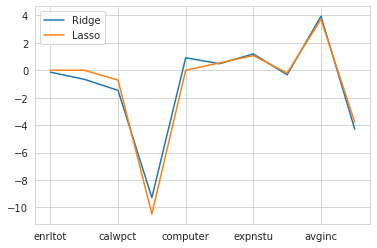

In [ ]:
reg_df.plot()

My best performing models were the scaled lasso and ridge regression models. Both appear to indicate the the most negatively associated features that determine test scores are the number of students who qualify for reduced-price lunch plans and the number of english learners within a given school. Conversely, the most positively associated features are the district average income and expenditure per student. 

#### 1.6 Discuss which final model you would choose to predict new data

Overall, I would select the scaled Lasso model. While both models display similar test set accuracy scores, the Lasso model is more parsimonious in terms of the number of features that it utilizes. 

## Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".

In [7]:
#Reading in data
red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/HW/HW 2 Data/winequality-red.csv', sep=';')
white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/HW/HW 2 Data/winequality-white.csv', sep=';')
print(red.shape)
print(white.shape)
red.head()

(1599, 12)
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#Creating winetype variable
red['winetype'] = 1
white['winetype'] = 0
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
#Merging both dataframes
frames = [red, white]
wine = pd.concat(frames)
print(wine[wine['winetype']==1].shape)
print(wine[wine['winetype']==0].shape)
wine.head()

(1599, 13)
(4898, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

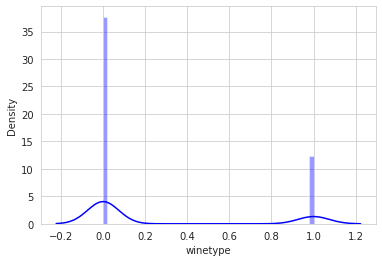

In [ ]:
# Visualizing distribution of wine type (dependent variable)
sns.set_style('whitegrid')
sns.distplot(wine['winetype'], kde = True, color ='blue')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


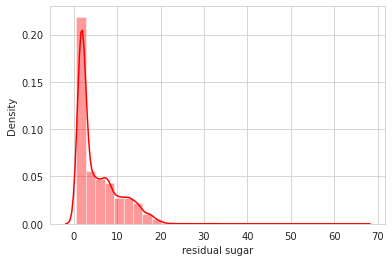

In [ ]:
sns.set_style('whitegrid')
sns.distplot(wine['residual sugar'], kde = True, color ='red', bins = 30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


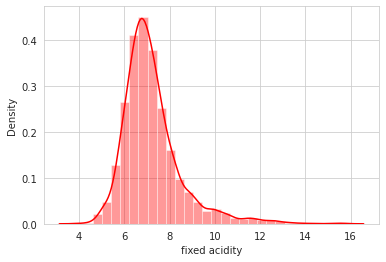

In [ ]:
sns.set_style('whitegrid')
sns.distplot(wine['fixed acidity'], kde = True, color ='red', bins = 30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


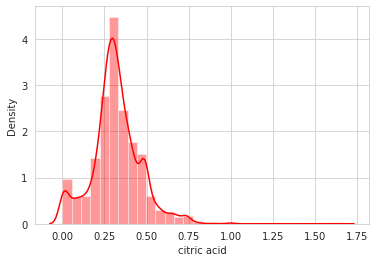

In [ ]:
sns.set_style('whitegrid')
sns.distplot(wine['citric acid'], kde = True, color ='red', bins = 30)

#### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [10]:
# train_test_split(X,y) to create four new data sets to .75/.25 split.

y_w = wine['winetype']
X_w = wine.loc[:, wine.columns != 'winetype']

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=.25, random_state=1)

print(X_w.shape)
X_train_w.shape

(6497, 12)


(4872, 12)

In [11]:
## Creating Model Architecture
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

#KNN Classifier
kfold = KFold(n_splits=5)
knn_c = KNeighborsClassifier(n_neighbors=5)
knn_cw = knn_c.fit(X_train_w, y_train_w)
print("KNN Training set score:\n{}".format(
mean(cross_val_score(knn_c, X_train_w, y_train_w, cv=kfold))))
print("KNN Test set score: {:.3f}".format(knn_cw.score(X_test_w, y_test_w)))

#Logistic
logreg = LogisticRegression(penalty='none').fit(X_train_w, y_train_w)
print("Logit Training set score:\n{}".format(
mean(cross_val_score(LogisticRegression(), X_train_w, y_train_w, cv=kfold))))
print("Logit Test set score: {:.3f}".format(logreg.score(X_test_w, y_test_w)))

#L1 Lasso
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train_w, y_train_w)
print("L1 Training set score:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty='l1', solver='liblinear'), X_train_w, y_train_w, cv=kfold))))
print("L1 Test set score: {:.3f}".format(logreg_lasso.score(X_test_w, y_test_w)))


KNN Training set score:
0.9392445637866582
KNN Test set score: 0.942
Logit Training set score:
0.9788593692412995
Logit Test set score: 0.975
L1 Training set score:
0.9858364660664456
L1 Test set score: 0.986


These results appear to be highly accurate and quite  similar. A Logistic model with an L1 penalty appears to be the most accurate at predicting wine type with a 98.6% accuracy rate.

In [15]:
#Setting up the the standard scaler to the X_train data using fit()
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_w)
X_train_scaled_w = scaler.transform(X_train_w)
X_test_scaled_w = scaler.transform(X_test_w)

#Redefining models
knn_scaled_w = knn_c.fit(X_train_scaled_w, y_train_w)
logreg_scaled = LogisticRegression(penalty='none').fit(X_train_scaled_w, y_train_w)
logreg_lasso_scaled = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train_scaled_w, y_train_w)

## Evaluating ecah model using scaled data
print("KNN Scaled Training set score:\n{}".format(
mean(cross_val_score(knn_c, X_train_scaled_w, y_train_w, cv=kfold)))) #KNN
print("KNN Scaled Test set score: {:.3f}".format(knn_scaled_w.score(X_test_scaled_w, y_test_w)))

print("Logistic Scaled Training set score:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty='none'), X_train_scaled_w, y_train_w, cv=kfold)))) #Logit
print("Logistic Scaled Test set score: {:.3f}".format(logreg_scaled.score(X_test_scaled_w, y_test_w)))

print("L1 Logit Scaled Training set score:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty='l1', solver='liblinear'), X_train_scaled_w, y_train_w, cv=kfold)))) #L1 Lasso
print("L1 Logit Scaled Test set score: {:.3f}".format(logreg_lasso_scaled.score(X_test_scaled_w, y_test_w)))


KNN Scaled Training set score:
0.9921998631074607
KNN Scaled Test set score: 0.988
Logistic Scaled Training set score:
0.9946620333807192
Logistic Scaled Test set score: 0.990
L1 Logit Scaled Training set score:
0.994456905175591
L1 Logit Scaled Test set score: 0.990


Scaling the data markedly improves the results for all three models, and it looks like now both the standard logistic and penalized logistic models are similarly accurate. 

#### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [16]:
#KNN
param_grid_knn_w = {'n_neighbors': np.arange(1,15,1)} 
grid_knn_w = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn_w, cv=10)
grid_knn_w.fit(X_train_scaled_w, y_train_w)
print("KNN best mean CV score: {:.3f}".format(grid_knn_w.best_score_))
print("KNN best parameters: {}".format(grid_knn_w.best_params_))
print("KNN test-set score: {:.3f}".format(grid_knn_w.score(X_test_scaled_w, y_test_w)))

#Logistic
param_grid_logit = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logit = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_logit, cv=10)
grid_logit.fit(X_train_scaled_w, y_train_w)
print("Logit best mean CV score: {:.3f}".format(grid_logit.best_score_))
print("Logit best parameters: {}".format(grid_logit.best_params_))
print("Logit test-set score: {:.3f}".format(grid_logit.score(X_test_scaled_w, y_test_w)))

#L1 Lasso
param_grid_lasso_w = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lasso_w = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid=param_grid_lasso_w, cv=10)
grid_lasso_w.fit(X_train_scaled_w, y_train_w)
print("Lasso best mean CV score: {:.3f}".format(grid_lasso_w.best_score_))
print("Lasso best parameters: {}".format(grid_lasso_w.best_params_))
print("Lasso test-set score: {:.3f}".format(grid_lasso_w.score(X_test_scaled_w, y_test_w)))

KNN best mean CV score: 0.977
KNN best parameters: {'n_neighbors': 2}
KNN test-set score: 0.950
Logit best mean CV score: 0.994
Logit best parameters: {'C': 0.001}
Logit test-set score: 0.990
Lasso best mean CV score: 0.994
Lasso best parameters: {'C': 10}
Lasso test-set score: 0.990


The results appear to be relatively the same as prior to running GridSearchCV. Interestingly, the KNN model decreased slightly in accuracy.

#### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

In [18]:
#KNN
kfold_s = KFold(n_splits=5, shuffle=True)
param_grid_knn_w = {'n_neighbors': np.arange(1,15,1)} 
grid_knn_w = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn_w, cv=kfold_s)
grid_knn_w.fit(X_train_scaled_w, y_train_w)
print("KNN best mean CV score: {:.3f}".format(grid_knn_w.best_score_))
print("KNN best parameters: {}".format(grid_knn_w.best_params_))
print("KNN test-set score: {:.3f}".format(grid_knn_w.score(X_test_scaled_w, y_test_w)))

#Logistic
param_grid_logit = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logit = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_logit, cv=kfold_s)
grid_logit.fit(X_train_scaled_w, y_train_w)
print("Logit best mean CV score: {:.3f}".format(grid_logit.best_score_))
print("Logit best parameters: {}".format(grid_logit.best_params_))
print("Logit test-set score: {:.3f}".format(grid_logit.score(X_test_scaled_w, y_test_w)))

#L1 Lasso
param_grid_lasso_w = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lasso_w = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid=param_grid_lasso_w, cv=kfold_s)
grid_lasso_w.fit(X_train_scaled_w, y_train_w)
print("Lasso best mean CV score: {:.3f}".format(grid_lasso_w.best_score_))
print("Lasso best parameters: {}".format(grid_lasso_w.best_params_))
print("Lasso test-set score: {:.3f}".format(grid_lasso_w.score(X_test_scaled_w, y_test_w)))

KNN best mean CV score: 0.973
KNN best parameters: {'n_neighbors': 3}
KNN test-set score: 0.952
Logit best mean CV score: 0.994
Logit best parameters: {'C': 0.001}
Logit test-set score: 0.990
Lasso best mean CV score: 0.994
Lasso best parameters: {'C': 10}
Lasso test-set score: 0.990


It looks like implementing shuffling does not change the parameters for the logit or lasso models. However, doing so does increase the best 'n' size for the KNN model from 2 to 3, which comes with an associated 0.02 increase in test set accuracy.

In [19]:
#Altering random state parameter
X_train_w2, X_test_w2, y_train_w2, y_test_w2 = train_test_split(X_w, y_w, test_size=.25, random_state=2)
scaler.fit(X_train_w2)
X_train_scaled_w2 = scaler.transform(X_train_w2)
X_test_scaled_w2 = scaler.transform(X_test_w2)

#KNN
kfold_s = KFold(n_splits=5, shuffle=True)
param_grid_knn_w = {'n_neighbors': np.arange(1,15,1)} 
grid_knn_w = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn_w, cv=kfold_s)
grid_knn_w.fit(X_train_scaled_w2, y_train_w2)
print("KNN best mean CV score: {:.3f}".format(grid_knn_w.best_score_))
print("KNN best parameters: {}".format(grid_knn_w.best_params_))
print("KNN test-set score: {:.3f}".format(grid_knn_w.score(X_test_scaled_w2, y_test_w2)))

#Logistic
param_grid_logit = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logit = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid_logit, cv=kfold_s)
grid_logit.fit(X_train_scaled_w2, y_train_w2)
print("Logit best mean CV score: {:.3f}".format(grid_logit.best_score_))
print("Logit best parameters: {}".format(grid_logit.best_params_))
print("Logit test-set score: {:.3f}".format(grid_logit.score(X_test_scaled_w2, y_test_w2)))

#L1 Lasso
param_grid_lasso_w = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lasso_w = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid=param_grid_lasso_w, cv=kfold_s)
grid_lasso_w.fit(X_train_scaled_w2, y_train_w2)
print("Lasso best mean CV score: {:.3f}".format(grid_lasso_w.best_score_))
print("Lasso best parameters: {}".format(grid_lasso_w.best_params_))
print("Lasso test-set score: {:.3f}".format(grid_lasso_w.score(X_test_scaled_w2, y_test_w2)))

KNN best mean CV score: 0.966
KNN best parameters: {'n_neighbors': 4}
KNN test-set score: 0.974
Logit best mean CV score: 0.994
Logit best parameters: {'C': 0.001}
Logit test-set score: 0.996
Lasso best mean CV score: 0.995
Lasso best parameters: {'C': 10}
Lasso test-set score: 0.996


Changing the random state of the split into training and test data causes new cuts to be taken of the original x and y dataframes. This causes the accuracy figures to change slightly. In this case, the scores for all three models improve.

#### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [20]:
#Printing coefficients of linear and Ridge Models
logit_scaled_fin = LogisticRegression(penalty='none', C=0.001).fit(X_train_scaled_w, y_train_w)
lasso_scaled_fin_w = LogisticRegression(penalty='l1', solver='liblinear', C=10).fit(X_train_scaled_w, y_train_w)

logit_result = np.array(logit_scaled_fin.coef_).flatten()
lasso_result = np.array(lasso_scaled_fin_w.coef_).flatten()

d_w = {'Logit': logit_result, 'Lasso': lasso_result}
reg_df_w = pd.DataFrame(data=d_w, index=X_train_w.columns)

reg_df_w.round(decimals=2)

,Logit,Lasso
fixed acidity,-0.28,-0.22
volatile acidity,1.29,1.30
citric acid,-0.44,-0.43
residual sugar,-5.45,-5.28
chlorides,0.88,0.88
free sulfur dioxide,1.46,1.41
total sulfur dioxide,-3.85,-3.79
density,5.56,5.37
pH,-0.23,-0.17
sulphates,0.70,0.71


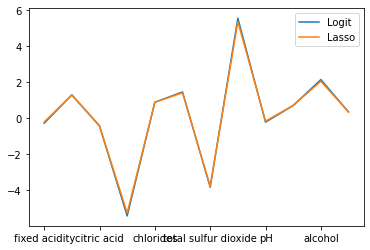

In [21]:
reg_df_w.plot()

Ultimately, the coefficients for both the Logistic and Penalized Logistic (L1) models are very similar. Higher residual sugar content and sulfur dioxide are most negaitvely associated with red wine, whereas higher volatile acidity, density, and alcohol content are most positively associated. 

For my final model, I would likely select the unpenalized logistic model. Because both models have simlar accuracy rates, I would chose the model that is simplest in its parameters.